<a href="https://colab.research.google.com/github/CO-Pratham/Breast-cancer-classfication-using-gaussian-naive-bayes-/blob/main/Medical_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#check the dataset and display first 5 rows of dataset
df = pd.read_csv('data.csv')
print(df.head())


   S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
0    1  2019   40          1               2         0  Right          0   
1    2  2019   39          1               2         0   Left          0   
2    3  2019   45          0               4         0   Left          0   
3    4  2019   26          1               3         0   Left          0   
4    5  2019   21          1               1         0  Right          0   

  Breast Quadrant History Diagnosis Result  
0     Upper inner       0           Benign  
1     Upper outer       0           Benign  
2     Lower outer       0           Benign  
3     Lower inner       1           Benign  
4     Upper outer       1           Benign  


In [ ]:
#check column names and baisc data insights
print("Columns:", df.columns.tolist())
print("\nNull values:\n", df.isnull().sum())



Columns: ['age', 'menopause', 'diagnosis', 'tumor size (cm)_1', 'tumor size (cm)_10', 'tumor size (cm)_12', 'tumor size (cm)_14', 'tumor size (cm)_2', 'tumor size (cm)_3', 'tumor size (cm)_4', 'tumor size (cm)_5', 'tumor size (cm)_6', 'tumor size (cm)_7', 'tumor size (cm)_8', 'tumor size (cm)_9', 'inv-nodes_0', 'inv-nodes_1', 'inv-nodes_3', 'breast_left', 'breast_right', 'metastasis_0', 'metastasis_1', 'breast quadrant_lower inner', 'breast quadrant_lower outer', 'breast quadrant_upper inner', 'breast quadrant_upper outer', 'breast quadrant_upper outer', 'history_0', 'history_1']

Null values:
 age                            0
menopause                      0
diagnosis                      0
tumor size (cm)_1              0
tumor size (cm)_10             0
tumor size (cm)_12             0
tumor size (cm)_14             0
tumor size (cm)_2              0
tumor size (cm)_3              0
tumor size (cm)_4              0
tumor size (cm)_5              0
tumor size (cm)_6              0
tu

In [ ]:
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]
print("Updated Columns:", df.columns)


Updated Columns: Index(['age', 'menopause', 'diagnosis', 'tumor_size_cm_1', 'tumor_size_cm_10',
       'tumor_size_cm_12', 'tumor_size_cm_14', 'tumor_size_cm_2',
       'tumor_size_cm_3', 'tumor_size_cm_4', 'tumor_size_cm_5',
       'tumor_size_cm_6', 'tumor_size_cm_7', 'tumor_size_cm_8',
       'tumor_size_cm_9', 'inv-nodes_0', 'inv-nodes_1', 'inv-nodes_3',
       'breast_left', 'breast_right', 'metastasis_0', 'metastasis_1',
       'breast_quadrant_lower_inner', 'breast_quadrant_lower_outer',
       'breast_quadrant_upper_inner', 'breast_quadrant_upper_outer',
       'breast_quadrant_upper_outer', 'history_0', 'history_1'],
      dtype='object')


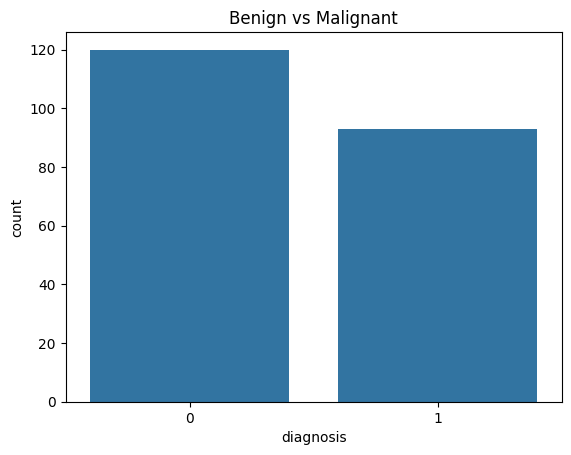

In [ ]:
sns.countplot(x='diagnosis', data=df)
plt.title("Benign vs Malignant")
plt.show()


In [ ]:
#Prepare data for training and check the shapes of features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (213, 28)
Shape of y: (213,)


In [ ]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 170
Test size: 43


In [ ]:
#train the model accoding to already train dataset
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Model Accuracy: 90.70%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.76      0.87        17

    accuracy                           0.91        43
   macro avg       0.93      0.88      0.90        43
weighted avg       0.92      0.91      0.90        43



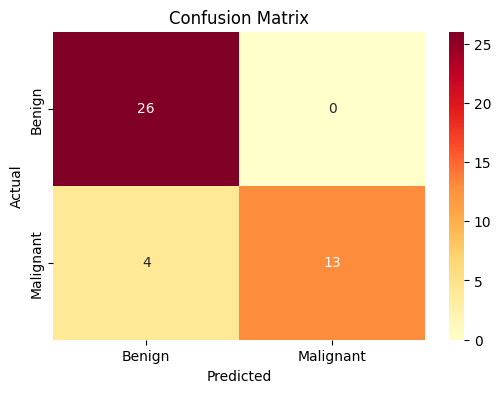

In [ ]:
#Make predictions using the trained model
y_pred = model.predict(X_test)


# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Generate a classification report
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
